
# Instructions

1. This assignment is worth 5% of the final grade.
2. In the questions below, insert a cell (code or markdown, as appropriate), and fill in your answers there.
3. You are required to work on this individually. Any form of plagiarism will result in 0.
4. If you need scripts package, please download it and change the name to scripts1. Then you can import it.
5. Please try to apply the methods or instrucrtions in lecture. 

# Question 1

The file `resale_flat_prices.csv` contains resale flat prices in Singapore from January 2017 onwards. The objective is to predict `resale_price` on all of `town`, `storey_range`, `floor_area_sqm`, and `remaining_lease`.

**July 2018 --training set and August 2018 --test set.**

1. Decision trees are a nonparametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation. The hyper-parameter is the he maximum depth of the tree. Create a sklearn decision tree regressor, then generate and plot the validation curve on the *training set* by varying the maximum depth over a sensible range of values.
2. Apply the best regressor to the *test set*, interpret the model, and compare its performance to that of multiple linear regression. Suggest one or two ways you may try to improve the decision tree regressor (you do not have to implement them).

+ 决策树是一种用于分类和回归的非参数监督学习方法。 目标是创建一个模型，通过学习从数据特征推断出的简单决策规则来预测目标变量的值。 一棵树可以看作是分段常数近似。 超参数是树的最大深度。 创建 sklearn 决策树回归器，然后通过在合理的值范围内改变最大深度来生成并绘制训练集上的验证曲线。
+ 将最佳回归器应用于测试集，解释模型，并将其性能与多元线性回归的性能进行比较。 建议您可以尝试改进决策树回归器的一两种方法（您不必实施它们）

## Data exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Read the data and divide the data set
data = pd.read_csv("./resale_flat_prices.csv")
#Extract data information from a string
time = data.loc[:,'remaining_lease'].str.split('years|""|month', expand=True)
time.columns = ["year","month","string"]

#Astype cannot convert int   to numeric functions
time.year = pd.to_numeric(time.year)
time.month = pd.to_numeric(time.month)
time.month = time.month.fillna(0)
data.remaining_lease = time.year * 12 + time.month


storey = data.loc[:,'storey_range'].str.split('TO|" "', expand=True)
storey.columns = ["fir","sed"]
storey.fir = pd.to_numeric(storey.fir)
storey.sed = pd.to_numeric(storey.sed)
data.storey_range = (storey.fir + storey.sed) / 2
data.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,11.0,44.0,Improved,1979,736.0,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,2.0,67.0,New Generation,1978,727.0,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,749.0,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,5.0,68.0,New Generation,1980,745.0,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,749.0,265000.0
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,2.0,68.0,New Generation,1981,756.0,275000.0
6,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,5.0,68.0,New Generation,1979,738.0,280000.0
7,2017-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,5.0,67.0,New Generation,1976,700.0,285000.0
8,2017-01,ANG MO KIO,3 ROOM,447,ANG MO KIO AVE 10,5.0,68.0,New Generation,1979,738.0,285000.0
9,2017-01,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,2.0,67.0,New Generation,1979,736.0,285000.0


In [21]:
def find_la(row):  
    if row.town == 'ANG MO KIO':
        return 1.370167
    elif row.town == 'BEDOK':
        return 1.3236 
    elif row.town == 'BISHAN':
        return 1.350833
    elif row.town == 'BUKIT BATOK':
        return 1.359031
    elif row.town == 'BUKIT MERAH':
        return 1.281906
    elif row.town == 'BUKIT PANJANG':
        return 1.380833
    elif row.town == 'BUKIT TIMAH':
        return 1.329411
    elif row.town == 'CENTRAL AREA':
        return 1.300556
    elif row.town == 'CHOA CHU KANG':
        return 1.383333
    elif row.town == 'CLEMENTI':
        return 1.316111
    elif row.town == 'GEYLANG':
        return 1.320556
    elif row.town == 'HOUGANG':
        return 1.371778 
    elif row.town == 'JURONG EAST':
        return 1.328883
    elif row.town == 'JURONG WEST':
        return 1.339722
    elif row.town == 'KALLANG/WHAMPOA':
        return 1.310833 
    elif row.town == 'MARINE PARADE':
        return 1.303056 
    elif row.town == 'PASIR RIS':
        return 1.372094
    elif row.town == 'PUNGGOL':
        return 1.398278 
    elif row.town == 'QUEENSTOWN':
        return 1.294167
    elif row.town == 'SEMBAWANG':
        return 1.449111 
    elif row.town == 'SENGKANG':
        return 1.391667 
    elif row.town == 'SERANGOON':
        return 1.355356 
    elif row.town == 'TAMPINES':
        return 1.349592 
    elif row.town == 'TOA PAYOH':
        return 1.334303
    elif row.town == 'WOODLANDS':
        return 1.436269 
    elif row.town == 'YISHUN':
        return 1.43
    else:
        return 0

 
def find_long(row):  
    if row.town == 'ANG MO KIO':
        return 103.845619
    elif row.town == 'BEDOK':
        return 103.927339 
    elif row.town == 'BISHAN':
        return 103.851389
    elif row.town == 'BUKIT BATOK':
        return 103.763681
    elif row.town == 'BUKIT MERAH':
        return 103.823919
    elif row.town == 'BUKIT PANJANG':
        return 103.7625   
    elif row.town == 'BUKIT TIMAH':
        return 103.802078
    elif row.town == 'CENTRAL AREA':
        return 103.821667
    elif row.town == 'CHOA CHU KANG':
        return 103.75
    elif row.town == 'CLEMENTI':
        return 103.765
    elif row.town == 'GEYLANG':
        return 103.886944
    elif row.town == 'HOUGANG':
        return 103.893056
    elif row.town == 'JURONG EAST':
        return 103.739947
    elif row.town == 'JURONG WEST':
        return 103.704444
    elif row.town == 'KALLANG/WHAMPOA':
        return 103.865556 
    elif row.town == 'MARINE PARADE':
        return 103.907778   
    elif row.town == 'PASIR RIS':
        return 103.947372  
    elif row.town == 'PUNGGOL':
        return 103.908972 
    elif row.town == 'QUEENSTOWN':
        return 103.786128
    elif row.town == 'SEMBAWANG':
        return 103.818494
    elif row.town == 'SENGKANG':
        return 103.894444 
    elif row.town == 'SERANGOON':
        return 103.867869 
    elif row.town == 'TAMPINES':
        return 103.956789 
    elif row.town == 'TOA PAYOH':
        return 103.856328  
    elif row.town == 'WOODLANDS':
        return 103.786706
    elif row.town == 'YISHUN':
        return 103.835 
    else:
        return 0   
data['latitude']=data.apply(find_la,axis=1)
data['longitude']=data.apply(find_long,axis=1)
# from sklearn.preprocessing import LabelEncoder
# encoder = LabelEncoder()
# town = encoder.fit_transform(data.town.values.reshape(-1,1))
# data.town = town

In [23]:
data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,latitude,longitude
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,11.0,44.0,Improved,1979,736.0,232000.0,1.370167,103.845619
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,2.0,67.0,New Generation,1978,727.0,250000.0,1.370167,103.845619
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,749.0,262000.0,1.370167,103.845619
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,5.0,68.0,New Generation,1980,745.0,265000.0,1.370167,103.845619
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,2.0,67.0,New Generation,1980,749.0,265000.0,1.370167,103.845619
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106818,2021-09,YISHUN,4 ROOM,505C,YISHUN ST 51,2.0,92.0,Model A,2016,1123.0,470000.0,1.430000,103.835000
106819,2021-09,YISHUN,4 ROOM,762,YISHUN ST 72,8.0,84.0,Simplified,1985,758.0,395000.0,1.430000,103.835000
106820,2021-09,YISHUN,5 ROOM,310,YISHUN RING RD,8.0,126.0,Improved,1995,870.0,547000.0,1.430000,103.835000
106821,2021-09,YISHUN,5 ROOM,334C,YISHUN ST 31,11.0,112.0,Improved,2015,1119.0,595000.0,1.430000,103.835000


In [24]:
train_0 = (data.loc[data["month"] == "2018-07"])
test_0 = (data.loc[data["month"] == "2018-08"])
#Use the specified number of columns for prediction
train = train_0[["latitude","longitude","storey_range","floor_area_sqm","remaining_lease","resale_price"]]
test = test_0[["latitude","longitude","storey_range","floor_area_sqm","remaining_lease","resale_price"]]
train

,latitude,longitude,storey_range,floor_area_sqm,remaining_lease,resale_price
30198,1.370167,103.845619,11.0,44.0,706.0,202000.0
30199,1.370167,103.845619,11.0,44.0,702.0,210000.0
30200,1.370167,103.845619,8.0,68.0,741.0,230000.0
30201,1.370167,103.845619,2.0,67.0,720.0,240000.0
30202,1.370167,103.845619,2.0,68.0,721.0,245000.0
...,...,...,...,...,...,...
32732,1.430000,103.835000,5.0,146.0,833.0,538000.0
32733,1.430000,103.835000,2.0,146.0,832.0,590000.0
32734,1.430000,103.835000,5.0,142.0,814.0,620888.0
32735,1.430000,103.835000,11.0,146.0,822.0,650000.0


##  model

In [29]:
from sklearn.tree import DecisionTreeRegressor

x = train.iloc[: , :5]
y = train.iloc[: , 5:6]
x_test = test.iloc[: , :5]
y_test = test.iloc[: , 5:6]
regr = DecisionTreeRegressor(max_depth=4)
regr.fit(x,y)
print("Training score:%f"%(regr.score(x,y)))

Training score:0.691266


## Draw vc curve

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  48 out of  95 | elapsed:    1.4s remaining:    1.4s
[Parallel(n_jobs=8)]: Done  95 out of  95 | elapsed:    1.5s finished


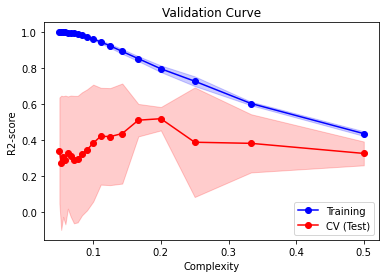

In [27]:
from sklearn.model_selection import validation_curve
 
nn_range= np.arange(20, 1, -1)
train_scores, cv_scores = validation_curve(regr, x,y, 
                                           param_name='max_depth', cv=5, n_jobs=8,
                                           param_range=nn_range, scoring='r2', verbose=2)

train_means = np.mean(train_scores, axis=1)
train_sd = np.std(train_scores, axis=1)

cv_means = np.mean(cv_scores, axis=1)
cv_sd = np.std(cv_scores, axis=1)

plt.plot(1/nn_range, train_means, 'o-', label='Training', color='blue')
plt.fill_between(1/nn_range, train_means-train_sd, train_means+train_sd, color='blue', alpha=0.2)

plt.plot(1/nn_range, cv_means, 'o-', label='CV (Test)', color='red')
plt.fill_between(1/nn_range, cv_means-cv_sd, cv_means+cv_sd, color='red', alpha=0.2)

plt.legend(loc='lower right');plt.ylabel('R2-score');plt.xlabel('Complexity');plt.title('Validation Curve');

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth':np.arange(1, 15)}


rfc = DecisionTreeRegressor(random_state=66)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(x,y)
print(GS.best_params_)
print(GS.best_score_)

{'max_depth': 4}
0.4669795326292485


## application

In [38]:
pre = DecisionTreeRegressor(max_depth=4,random_state=66)
pre.fit(x,y) 
y_test_probs = pre.predict(x_test)
pre.score(x_test,y_test)

0.7005851771645901

In [37]:
from sklearn import linear_model
#Compare multiple linear regression models
model=linear_model.LinearRegression()
model.fit(x,y)

#predict
y_predict=model.predict(x_test)
model.score(x_test,y_test)

0.7248400182953221

# Question 2

Download and run the TensorFlow implementation of the SSD object detection model on these four images: `BKE_after_KJE_exit.jpg`, `BKE_MandaiRd_entrance.jpg`, `PIE_KallangWay.jpg`, and `PIE_KimKeatLink.jpg`.

**Comment on the performance of the object detection model.** In a cell below, include the precise command you entered to run the SSD model:

In [ ]:
# Fill in the details here and uncomment:
#
# %run opencv-master .....
# --model ....
# ....
# --classes ....

**comment**

Compared with the YOLO model, the accuracy of SSD is greatly improved. However, SSD are sensitive to small objects and perform poorly in detecting small objects.

In [10]:
import scripts1.download_models as dm
# For object detection
SSDmod = [x for x in dm.models if x.name.startswith('MobileNet-SSD v1 (TensorFlow)')][0]
SSDmod.get()

  expect 6157ddb6da55db2da89dd561eceb7f944928e317
  catch [Errno 2] No such file or directory: 'ssd_mobilenet_v1_coco_2017_11_17.tar.gz'
  hash check failed - downloading
  get http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v1_coco_2017_11_17.tar.gz
  200 OK [72.98920917510986 Mb]
  progress >>>>>>>> done
 file ssd_mobilenet_v1_coco_2017_11_17.tar.gz
  expect 6157ddb6da55db2da89dd561eceb7f944928e317
  actual 6157ddb6da55db2da89dd561eceb7f944928e317


True

In [1]:
!findstr /n SSD models.yml
print(*open('models.yml').readlines()[51:90], sep="")

42:# Caffe implementation of SSD model from https://github.com/chuanqi305/MobileNet-SSD
44:  model: "MobileNetSSD_deploy.caffemodel"
45:  config: "MobileNetSSD_deploy.prototxt"
54:# TensorFlow implementation of SSD model from https://github.com/tensorflow/models/tree/master/research/object_detection
  sample: "object_detection"

# TensorFlow implementation of SSD model from https://github.com/tensorflow/models/tree/master/research/object_detection
ssd_tf:
  model: "ssd_mobilenet_v1_coco_2017_11_17.pb"
  config: "ssd_mobilenet_v1_coco_2017_11_17.pbtxt"
  mean: [0, 0, 0]
  scale: 1.0
  width: 300
  height: 300
  rgb: true
  classes: "object_detection_classes_coco.txt"
  sample: "object_detection"

# TensorFlow implementation of Faster-RCNN model from https://github.com/tensorflow/models/tree/master/research/object_detection
faster_rcnn_tf:
  model: "faster_rcnn_inception_v2_coco_2018_01_28.pb"
  config: "faster_rcnn_inception_v2_coco_2018_01_28.pbtxt"
  mean: [0, 0, 0]
  scale: 1.0
  wid

In [2]:
%run opencv-master/samples/dnn/object_detection.py --help

usage: object_detection.py [-h] [--zoo ZOO] [--input INPUT] [--out_tf_graph OUT_TF_GRAPH]
                           [--framework {caffe,tensorflow,torch,darknet,dldt}] [--thr THR] [--nms NMS]
                           [--backend {0,1,2,3,4,5}] [--target {0,1,2,3,8,4,6,7}] [--async ASYNCN] --model MODEL
                           [--config CONFIG] [--mean MEAN [MEAN ...]] [--scale SCALE] [--width WIDTH]
                           [--height HEIGHT] [--rgb] [--classes CLASSES]
                           [{opencv_fd,yolo,tiny-yolo-voc,ssd_caffe,ssd_tf,faster_rcnn_tf}]

Use this script to run object detection deep learning networks using OpenCV.

positional arguments:
  {opencv_fd,yolo,tiny-yolo-voc,ssd_caffe,ssd_tf,faster_rcnn_tf}
                        An alias name of model to extract preprocessing parameters from models.yml file. (default:
                        None)

optional arguments:
  -h, --help            show this help message and exit
  --zoo ZOO             An optional pat

In [ ]:
# teach in jupyter 
%run opencv-master/samples/dnn/object_detection.py --input ../BKE_after_KJE_exit.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
--config ssd_mobilenet_v1_coco_2017_11_17.pbtxt --scale 1.0 --width 300 --height 300 --rgb \
--classes object_detection_classes_coco.txt SSD
# %run opencv-master/samples/dnn/object_detection.py --input ../BKE_after_KJE_exit.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
# --config ssd_mobilenet_v1_coco_2017_11_17.pbtxt --scale 1.0 --width 300 --height 300 --rgb \
# --classes object_detection_classes_coco.txt 

# %run opencv-master/samples/dnn/object_detection.py --input ../BKE_MandaiRd_entrance.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
# --config ssd_mobilenet_v1_coco_2017_11_17.pbtxt --scale 1.0 --width 300 --height 300 --rgb \
# --classes object_detection_classes_coco.txt 

# %run opencv-master/samples/dnn/object_detection.py --input ../PIE_KallangWay.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
# --config ssd_mobilenet_v1_coco_2017_11_17.pbtxt --scale 1.0 --width 300 --height 300 --rgb \
# --classes object_detection_classes_coco.txt 

# %run opencv-master/samples/dnn/object_detection.py --input ../PIE_KimKeatLink.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
# --config ssd_mobilenet_v1_coco_2017_11_17.pbtxt --scale 1.0 --width 300 --height 300 --rgb \
# --classes object_detection_classes_coco.txt 

In [ ]:
python3 tf_text_graph_ssd.py \
    --input '/path/to/ssd_mobilenet_v2_coco_2018_03_29/frozen_inference_graph.pb' \
    --config '/path/to/ssd_mobilenet_v2_coco.config' \
    --output '/path/to/ssd_mobilenet_v2_coco_2018_03_29/graph.pbtxt' 

In [ ]:
# google from internet
%run opencv-master/samples/dnn/object_detection.py --input ../BKE_after_KJE_exit.jpg --model ssd_mobilenet_v1_coco_2017_11_17.pb \
--config ssd_mobilenet_v1_coco.config --scale 1.0 --width 300 --height 300 --rgb \
--classes object_detection_classes_coco.txt 

Exception in thread Thread-9:
Traceback (most recent call last):
  File "C:\Users\HP\Desktop\Assignment2\opencv-master\samples\dnn\object_detection.py", line 254, in processingThreadBody
    frame = framesQueue.get_nowait()
  File "D:\4_code\1_anaconda\envs\python38\lib\queue.py", line 198, in get_nowait
    return self.get(block=False)
  File "D:\4_code\1_anaconda\envs\python38\lib\queue.py", line 167, in get
    raise Empty
_queue.Empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\4_code\1_anaconda\envs\python38\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "D:\4_code\1_anaconda\envs\python38\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\HP\Desktop\Assignment2\opencv-master\samples\dnn\object_detection.py", line 261, in processingThreadBody
    except queue.Empty:
NameError: name 'queue' is not defined


TensorFlow Object Detection API config detected
Preparing text graph representation for SSD model: graph.pbtxt
Scale: [0.200000-0.950000]
Aspect ratios: [1.0, 2.0, 0.5, 3.0, 0.3333]
Reduce boxes in the lowest layer: True
Number of classes: 90
Number of layers: 6
box predictor: convolutional
Input image size: 300x300


## References

1. More details on regression trees - see section 8.1.1 of this book [pdf version available here](https://web.stanford.edu/~hastie/ISLR2/ISLRv2_website.pdf).
1. sklearn [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) on regression trees. 